In [ ]:
import numpy as np

N = 10
Ns = 2*N+1
psi0 = np.ones(Ns, dtype=complex)*0.01
t0=0.
t_end=1200
dt = 0.01

gamA = 0.16
gamB = gamA
gA = 0.44 + gamA
gB = 0
t1=1
t2=0.7


t_intra=np.concatenate((np.ones(N)*t1,np.ones(N+1)*t2))
t_inter=np.concatenate((np.ones(N)*t2,np.ones(N+1)*t1))
# t_intra=np.ones(Ns)*t1
# t_inter=np.ones(Ns)*t2

def psi_prime(t, psi):
    a = psi[0::2] # [...a...]
    b = psi[1::2] # [...b...]
    b_padded = np.pad(b, 1) # [0,...b...,0]
    print(1/(1+np.abs(a)**2))
    da_dt = (gA/(1+np.abs(a)**2)-gamA)*a + t_intra[0::2]*b_padded[1:]/1j + t_inter[0::2]*b_padded[:-1]/1j
    db_dt = (gB/(1+np.abs(b)**2)-gamB)*b + t_intra[1::2]*a[:-1]/1j + t_inter[1::2]*a[1:]/1j
    # da_dt =  t_intra[0::2]*b_padded[1:]/1j + t_inter[0::2]*b_padded[:-1]/1j
    # db_dt =  t_intra[1::2]*a[:-1]/1j + t_inter[1::2]*a[1:]/1j
    result = np.zeros(Ns, dtype=complex)
    result[0::2] = da_dt
    result[1::2] = db_dt
    return result # [...da_dt,db_dt...]


t_values = np.arange(t0,t_end, dt)
psi_values = np.zeros(shape= (len(t_values),Ns), dtype=complex)

psi = psi0

def rk4_step(func, y, t, delta_t):
    k1 = func(t,y)
    k2 = func(t + 0.5*delta_t, y+ 0.5*k1*delta_t)
    k3 = func(t + 0.5*delta_t, y+ 0.5*k2*delta_t)
    k4 = func(t+delta_t, y+k3*delta_t)
    return y + delta_t*(k1 + 2*k2 + 2*k3 +k4)/6


for i,t in enumerate(t_values):
    psi = rk4_step(func = psi_prime, y = psi, t=t, delta_t=dt)
    psi_values[i,:] = psi

# results are contained in t_values and psi_values

# def sample(desired_samples, t_values, psi_values):
#     current_size = t_values.shape[0]
#     step = current_size // desired_samples
#     return (t_values[::step], psi_values[::step, :])

# samp_t_values, samp_psi_values = sample(9000, t_values, psi_values)


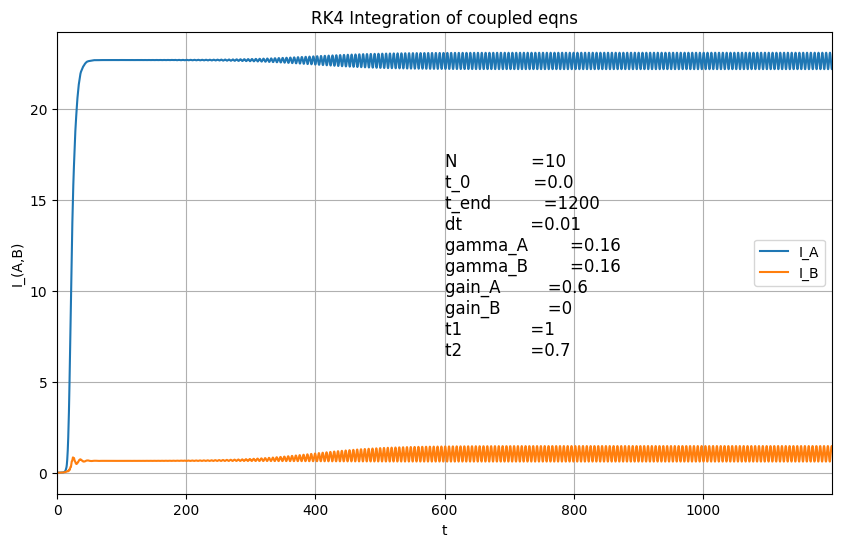

In [ ]:
import matplotlib.pyplot as plt

IA = np.sum(np.abs(psi_values[:,0::2])**2, axis=1)
IB = np.sum(np.abs(psi_values[:,1::2])**2, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(t_values, IA, label='I_A')
ax.plot(t_values, IB, label='I_B')

ax.set_xlabel('t')
ax.set_ylabel('I_(A,B)')
ax.legend()
ax.set_title('RK4 Integration of coupled eqns')
# ax.set_xlim((400,600))
# ax.set_ylim((30.2499,30.2501))
ax.set_xmargin(0)
ax.grid(True)
params = {'N':N, 't_0':t0, 't_end': t_end, 'dt':dt, 'gamma_A':gamA, 'gamma_B':gamB, 'gain_A': gA, 'gain_B':gB, 't1':t1, 't2':t2}
paramtext = "\n".join([ f"{key:<15}={value:<6}" for key, value in params.items()])
ax.text(x=.5, y=.3,s=paramtext, color='black', transform=ax.transAxes, size=12)

plt.show()

In [ ]:
# slicer = t_values>1000
# slice_t_values = t_values[slicer]
# slice_psi_values = psi_values[slicer,:]

# colours_real = slice_psi_values.flatten().real
# colours_imag = slice_psi_values.flatten().imag

# colours = np.concatenate((slice_psi_values.flatten().real, slice_psi_values.flatten().imag))

# fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

# scatters=[ax1.scatter(np.full_like(slice_t_values,i-N), slice_t_values, c=slice_psi_values[:,i].real, marker="_", vmin=colours.min(), vmax=colours.max(), cmap='coolwarm') for i in range(slice_psi_values.shape[1])]
# ax1.set_ymargin(0)
# ax1.grid(True)
# ax1.set_ylabel("t")
# ax1.set_xlabel("Site n")
# colorbar = plt.colorbar(scatters[0], ax=ax1)
# colorbar.set_label("Re psi_n(t)")

# scatters=[ax2.scatter(np.full_like(slice_t_values,i-N), slice_t_values, c=slice_psi_values[:,i].imag, marker="_", vmin=colours.min(), vmax=colours.max(), cmap='coolwarm') for i in range(slice_psi_values.shape[1])]
# ax2.set_ymargin(0)
# ax2.grid(True)
# ax2.set_ylabel("t")
# ax2.set_xlabel("Site n")



In [ ]:
# https://bitbucket.org/topologicalphotonics/pti_dynamic_model/src/master/src/run_ssh_sat_gain.cpp

psi_values.shape[1]

21